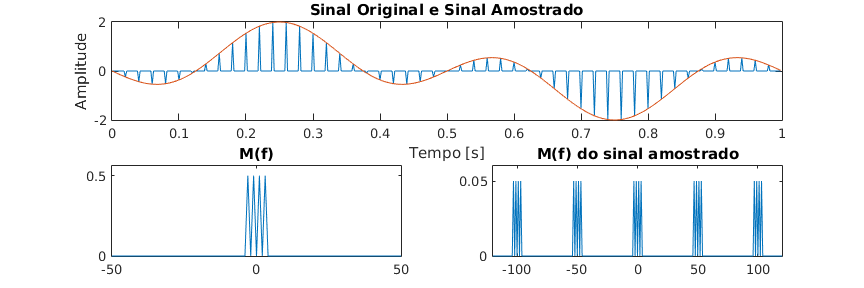

In [4]:
close all; clear all; clc;
%% Parâmetros
T=0.002;                                                % Taxa de amostragem (500kHz)
Tf=1;                                                   % Tempo final em segundos
t=0:T:Tf-T;                                             % Definição do eixo do tempo      
fm1=3;                                                  % Frequência senoide 1      
fm2=1;                                                  % Frequência senoide 2
m_t=sin(2*pi*fm2*t)-sin(2*pi*fm1*t);                    % Sinal mensagem m(t)
ts=0.02;                                                % Nova taxa de amostragem (para cima e para baixo)
N_samp=round(ts/T);                                     % Número de elementos 
% T/ts deve ser, preferencialmente, inteiro.

%% Amostragem 
s_out=downsample(m_t,N_samp);                           % Coleta 1 amostra a cada N_samp amostras do sinal  
s_out=upsample(s_out,N_samp);                           % Retorna vetor amostrado com o número inicial de elementos

%% Espectro do sinal de entrada
lfft=length(m_t);                                       % Comprimento da fft
M_f=fftshift(fft(m_t,lfft)/lfft);                       % Sinal m_t na frequência 
S_out=fftshift(fft(s_out,lfft)/lfft);                   % Sinal s_out na frequência
Fs=1/T;
freq=-Fs/2:Fs/lfft:Fs/2-Fs/lfft;

%% Salva todas as variáveis da área de trabalho (caso necessário, descomentar as linhas abaixo)
filename = 'Amostragem.mat';
save(filename);

%% Plotting
% Plot do sinal no tempo
fig = figure;
subplot(2,2,[1 2]);
plot(t,s_out);
hold on;
plot(t,m_t);
title('Sinal Original e Sinal Amostrado');
xlabel('Tempo [s]');
ylabel('Amplitude');

% Plot do sinal na frequência
subplot(2,2,3);
plot(freq,abs(M_f));
title('M(f)');
axis([-50 50 0 0.56]);
subplot(2,2,4);
plot(freq,abs(S_out));
title('M(f) do sinal amostrado');
axis([-120 120 0 0.06]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 3];

O erro estava na banda da Sinc, que estava menor que a maior frequência do sinal


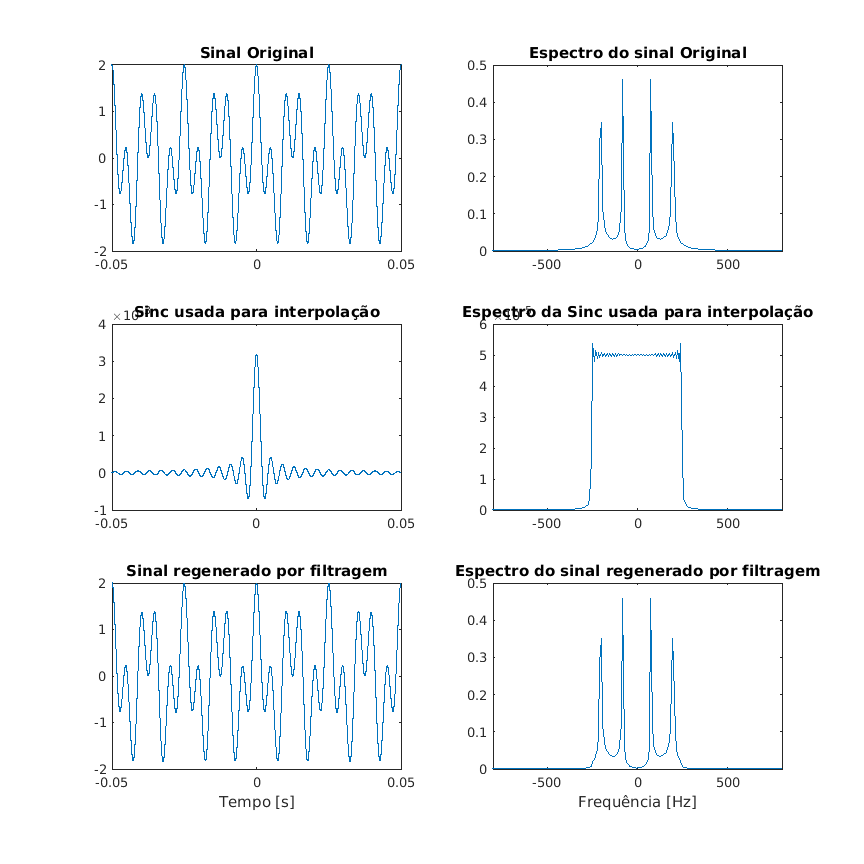

In [3]:
clear all;clc;close all;
%% Parâmetros da Sinc
B=250;                                                      % Banda do filtro
Ts=1/(200*pi*B);                                            % Taxa de geração (Passo no tempo)
Fs=1/Ts;                                                    % Frequência de amostragem
N=10000;                                                    % Número de amostras
tf=N*Ts;                                                    % Tempo final
t=-tf:Ts:tf;                                                % Eixo do tempo
Am=2*Ts*B;                                                  % Amplitude do sinal
s= Am*sinc(2*B*t);                                          % Sinc para reconstrução no tempo
m=cos(2*pi*200*t)+cos(2*pi*80*t);                           % Sinal m(t)

%% Convolução
c=conv(s,m);                                                % Calcula a convolução e realiza a filtragem no tempo
c=c(1,(length(t)-1)/2:3*(length(t)-1)/2);                   % Ajusta o tamanho do vetor
    
%% Espectros de frequência
lfft=length(s);                                             % Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft);                               % Sinc S(f)
M=fftshift(fft(m,lfft)/lfft);                               % Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft);                               % Sinal M(f) 
freq= -Fs/2:Fs/lfft:Fs/2-Fs/lfft;                           % Eixo da frequência

%% Gráficos 
% Plot do Sinal no tempo
fig = figure;
subplot(3,2,1);                                      
plot(t,m);
title('Sinal Original');
axis([-0.05 0.05 -2 2]);
% Plot do Sinal na frequência                   
subplot(3,2,2);
plot(freq,abs(M));        
title('Espectro do sinal Original');
axis([-800 800 0 0.5]);
%------------------------------------
% Plot do Sinc no tempo
subplot(3,2,3);                                      
plot(t,s);
title('Sinc usada para interpolação');
axis([-0.05 0.05 -1e-3 4e-3]);
% Plot do Sinc na frequência                   
subplot(3,2,4);
plot(freq,abs(S));       
title('Espectro da Sinc usada para interpolação');
axis([-800 800 0 6e-5]);
%------------------------------------
% Plot da convolução no tempo                                
subplot(3,2,5);
plot(t,c);      
title('Sinal regenerado por filtragem');
xlabel('Tempo [s]');
axis([-0.05 0.05 -2 2]);
% Plot da convolução na frequência   
subplot(3,2,6);
plot(freq,abs(C));
title('Espectro do sinal regenerado por filtragem');
xlabel('Frequência [Hz]');
axis([-800 800 0 0.5]);

disp('O erro estava na banda da Sinc, que estava menor que a maior frequência do sinal');

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];

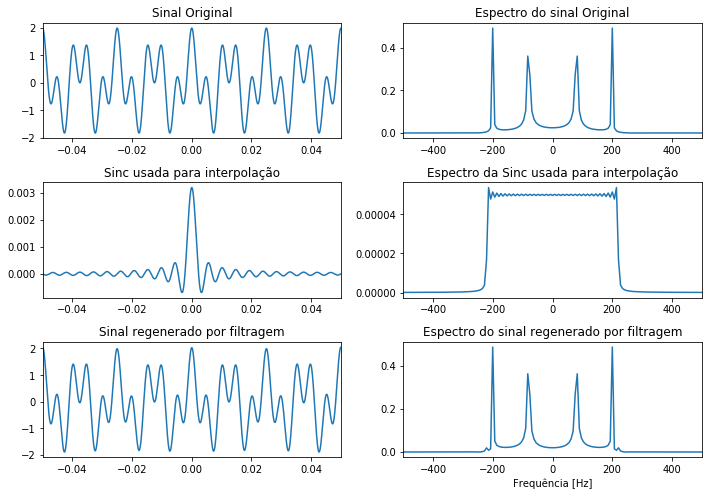

In [1]:
from scipy.fftpack import fft, fftshift
import numpy as np
from matplotlib import pyplot as plt

## Parâmetros da Sinc
B=220                                                      # Banda do filtro
Ts=1/(200*np.pi*B)                                         # Taxa de geração (Passo no tempo)
Fs=1/Ts                                                    # Frequência de amostragem
N=10000                                                    # Número de amostras
tf=N*Ts                                                    # Tempo final
t= np.arange(-tf,tf,Ts)                                    # Eixo do tempo
Am=2*Ts*B                                                  # Amplitude do sinal
s= Am*np.sinc(2*B*t)                                       # Sinc 
m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t)               # Sinal m(t)

## Convolução
c=np.convolve(s,m)                                         # Calcula a convolução
c = c[(len(t))//2:3*(len(t))//2]                           # Ajusta o tamanho do vetor (/2)
## Espectros
lfft=len(s)                                                # Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft)                               # Sinc S(f)
M=fftshift(fft(m,lfft)/lfft)                               # Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft)                               # Sinal M(f) 
freq = np.arange(-Fs/2,Fs/2-Fs/lfft,Fs/lfft)               # Eixo da frequência
# Gráficos
plt.figure(1,[10,7])
plt.subplot(321)
plt.title("Sinal Original")
plt.plot(t,m)
plt.xlim([-0.05,0.05])
#
plt.subplot(322)
plt.title("Espectro do sinal Original")
plt.plot(freq,np.abs(M))
plt.xlim([-500,500])
#
plt.subplot(323)
plt.title("Sinc usada para interpolação")
plt.plot(t,s)
plt.xlim([-0.05,0.05])
#
plt.subplot(324)
plt.title("Espectro da Sinc usada para interpolação")
plt.plot(freq,np.abs(S))
plt.xlim([-500,500])
#
plt.subplot(325)
plt.title("Sinal regenerado por filtragem")
plt.plot(t,c)
plt.xlim([-0.05,0.05])
#
plt.subplot(326)
plt.title("Espectro do sinal regenerado por filtragem")
plt.plot(freq,np.abs(C))
plt.xlabel("Frequência [Hz]");
plt.xlim([-500,500])
#
plt.tight_layout(pad=1.1)
plt.show()



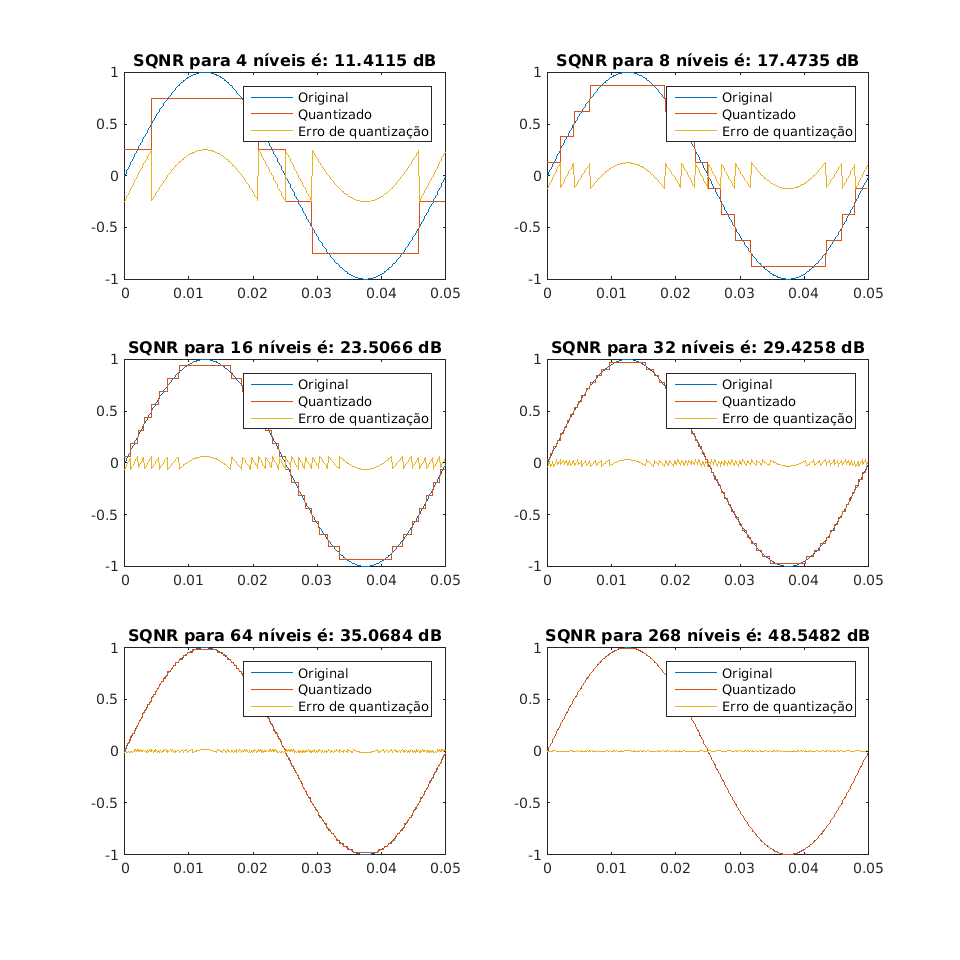

In [2]:
clc; clear all;close all;
%% Parâmetros
fs=8000;                                            % Frequência de amostragem
Ts=1/fs;                                            % Período de amostragem
fm=20;                                              % Frequência da onda
Tm=1/fm;                                            % Período de amostragem
t=0:Ts:Tm-Ts;                                       % Eixo do tempo
m_t=sin(2*pi*20*t);                                 % Sinal m(t)
L= [4 8 16 32 64 268];                              % Vetor com níveis de quantização

sig_max=max(m_t);                                   % Encontra pico máximo
sig_min=min(m_t);                                   % Encontra pico mínimo

%% Quantização com round() para cada nível de quantização especificado
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 10 10];
for il = 1:length(L)
    Li = L(il);
    Delta=(sig_max-sig_min)/Li;                     % Intervalo de quantização (separação entre um nível e outro)
    q_level=sig_min+Delta/2:Delta:sig_max-Delta/2;  % Vetor com amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)
    sigp=m_t-sig_min;                               % Deixa o sinal somente com amplitudes positivas (shift para cima)
    sigp = sigp/Delta;
    sigp = floor(sigp);
    % Agora que nenhum valor do sinal agora é zero nem negativo: isso é importante para que o vetor comece de 1
    qindex=round(sigp)+1;                             % Encontra inteiro mais proximo para cada elemento
    %É somado 1 ao vetor q index pois o índice 0 não é válido no MATLAB
    qindex=min(qindex,Li);                          % Trunca o excedente de qindex
    q_out=q_level(qindex);                          % Calcula a amplitude quantizada de cada amostra
    
    SQNR = 20*log10((abs(m_t))/abs(m_t-q_out));
    % Gráficos
    
    subplot(3,2,il)
    plot (t,m_t,t,q_out,t,(m_t-q_out));
    legend('Original', 'Quantizado','Erro de quantização');
    title(['SQNR para ' num2str(L(il)) ' níveis é: ' num2str(SQNR) ' dB']);
end

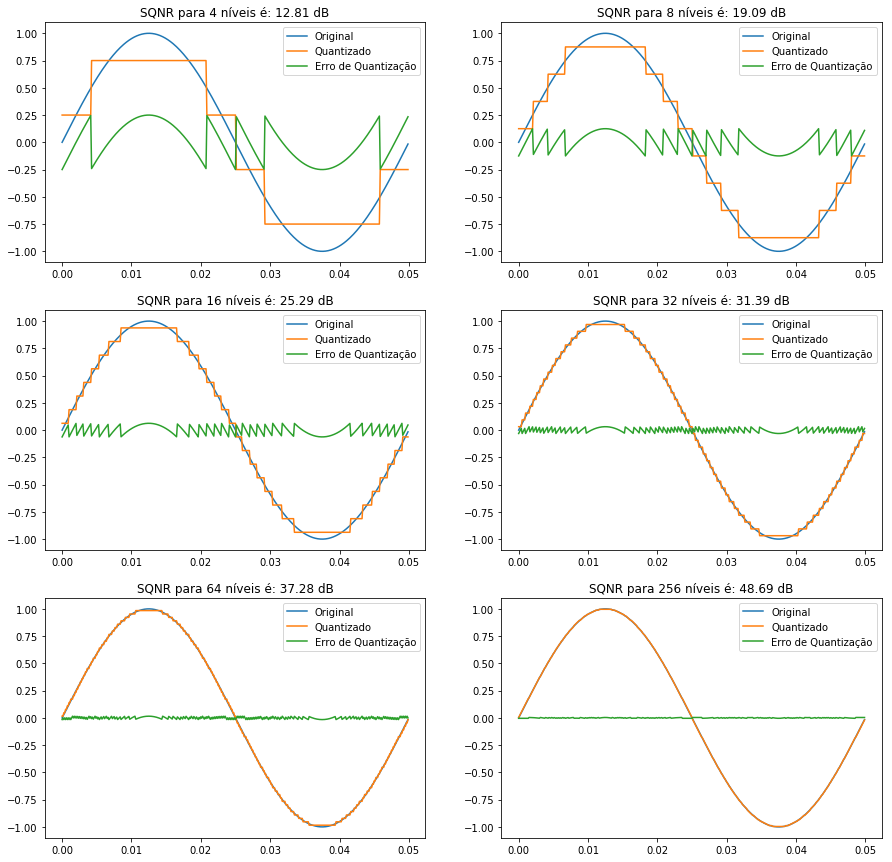

In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt

fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
L= [ 4, 8, 16, 32, 64, 256];                         # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
plt.figure(1,[15,15])
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp //= Delta

    qindex = sigp.astype(int)     #Forçamos o tipo do array como int para usar seus valores como índices
    qindex[qindex >= Li] = Li-1   #Trunca o excedente de qindex
    q_out = q_level[qindex] #Distribui os níveis de cada elemento
    
    x1 = np.var(m_t)
    x2 = np.var(m_t-q_out)
    
    x = x1/x2
    
    SQNR = 10*np.log10(x)

    # Plotting
    plt.subplot('32{}'.format(il+1))
    plt.plot(t,m_t,t,q_out,t,(m_t-q_out))
    
    plt.title('SQNR para {} níveis é: {:.2f} dB'.format(Li, SQNR))
    
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])
    
plt.show()
    


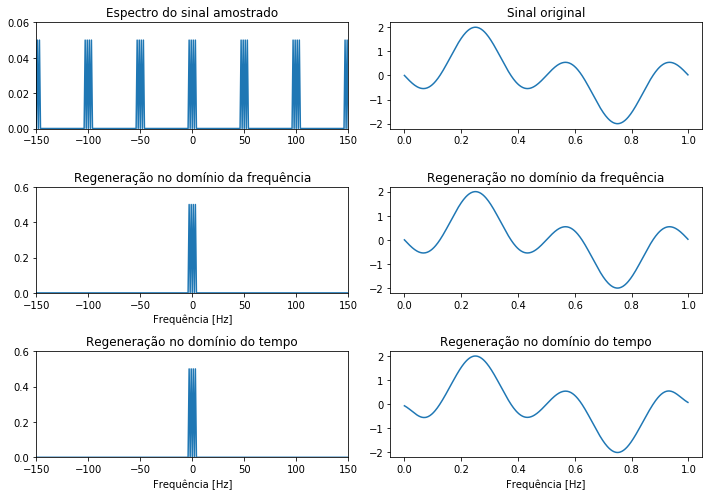

In [3]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft

# Para diminuir o tamanho do código desse experimento, coletaremos todos os dados Passo 1 da Prática 1
# e trabalharemos com o sinal gerado lá. Todas as variáveis terão o mesmo nome.
# O arquivo .mat deve sempre está na pasta em que o script está. Se necessário, rode o Passo 1 da Prática 1!!!
variaveis = loadmat('./Amostragem.mat')
T = float(variaveis['T'])
lfft = int(variaveis['lfft'])
N_samp = int(variaveis['N_samp'])
S_out = variaveis['S_out'].flatten()
s_out = variaveis['s_out'].flatten()
m_t = variaveis['m_t'].flatten()
t = variaveis['t'].flatten()
freq = variaveis['freq'].flatten()
Bs = fm1 = float(variaveis['fm1'])

# Reconstrução realizando a filtragem no domínio da frequência
BW=10                                                        # Largura de banda de 10
H_lpf=np.zeros(lfft)                                         # Zera vetor filtro
H_lpf[lfft//2-BW:lfft//2+BW-1]=1                             # Define 1 na frequência desejada
S_recv=N_samp*S_out*H_lpf                                    # Filtragem ideal
s_recv=np.real(ifft(fftshift(S_recv)))                       # Reconstroi o sinal no tempo
s_recv=s_recv*np.max(m_t)/np.max(s_recv)                     # Dá ganho pro sinal reconstruído

#  Reconstrução realizando a filtragem no domínio do tempo por meio 
#  de uma interpolação explícita (usando a função sinc)
# Gera laço para somatório
Tsinc = 0.002                                                # Passo de tempo da sinc
Tfsinc = 50                                                  # Tempo Final da sinc
tsinc = np.arange(0,Tfsinc,Tsinc)                            # Eixo de tempo da sinc
nSamples = len(s_out)                                        # Mede-se o comprimento do sinal
xSamples = np.arange(0,nSamples)                             # Vetor ordenado de amostras
s_recvSinc=0
for ik in xSamples:      
    Nx_sinc = s_out[ik]*np.sinc(2*np.pi*Bs*(tsinc-ik*T))     # Cria sinc para a amostra ik
    s_recvSinc = s_recvSinc+Nx_sinc                          # Faz somatórios das sincs
    
s_recvSinc=s_recvSinc[0:lfft]                                # Corrige comprimento do vetor
s_recvSinc=s_recvSinc*(np.max(m_t)/np.max(s_recvSinc))       # Ajusta o ganho
S_recvSinc = fftshift(fft(s_recv,lfft)/lfft)

# Gráficos Reconstrução realizando a filtragem no domínio da frequência
# Plota espectro do sinal regenerado pelos dois métodos
plt.figure(1,[10,7])
plt.subplot(321)
plt.title("Espectro do sinal amostrado")
plt.plot(freq,np.abs(S_out))
plt.xlim([-150,150])
plt.ylim([0,0.06])
#
plt.subplot(323);
plt.plot(freq,abs(S_recv))
plt.title("Regeneração no domínio da frequência")
plt.xlabel("Frequência [Hz]")
plt.xlim([-150,150])
plt.ylim([0,0.6])
#
plt.subplot(325)
plt.plot(freq,abs(S_recvSinc))
plt.title("Regeneração no domínio do tempo")
plt.xlabel("Frequência [Hz]")
plt.xlim([-150,150])
plt.ylim([0,0.6])
# Plota sinal regenerado pelos dois métodos
plt.subplot(322)
plt.plot(t,m_t)
plt.title("Sinal original")
#
plt.subplot(324);
plt.plot(t,s_recv[:lfft])
plt.title("Regeneração no domínio da frequência")
#
plt.subplot(326)
plt.plot(t,s_recvSinc[:lfft])
plt.title("Regeneração no domínio do tempo");
plt.xlabel("Frequência [Hz]");
plt.tight_layout()
plt.show()
